In [1]:
"""
Name: fd_MC.ipynb
Authors: Stephan Meighen-Berger, Martina Karl
Example for the MC method runs
"""

'\nName: fd_MC.ipynb\nAuthors: Stephan Meighen-Berger, Martina Karl\nExample for the MC method runs\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd

In [3]:
# Adding path to module
sys.path.append("../")

In [4]:
# picture path
PICS = '../pics/'

In [5]:
# Module imports
from fourth_day import Fourth_Day, config

In [6]:
# Some example settings
config['scenario']['population size'] = 100
config["scenario"]['duration'] = 100

In [7]:
# Creating a fourth_day object
fd = Fourth_Day()

In [8]:
# Launching solver
fd.sim()

In [9]:
fd.statistics[-1]

,species,pos_x,pos_y,velocity,angle,radius,energy,max_emission,emission fraction,regeneration,is_emitting,emission_duration,encounter photons
0,Ctenophores Haeckelia rubra (KoÃˆlliker),0.396171,0.366814,-0.001122,1.251759,0.000952,1.0,10.959537,0.1,0.001,False,-100.0,0.0
1,Cnidaria_Hydrozoa Halicreidae unidentified spe...,-0.383283,0.336741,0.006542,2.779388,0.001122,1.0,12.474711,0.1,0.001,False,-100.0,0.0
2,Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_P...,0.416454,-0.236545,0.001501,0.332521,0.001164,1.0,8.323272,0.1,0.001,False,-100.0,0.0
3,Ctenophores Thalassocalyce inconstans Madin an...,0.398809,0.002405,0.004125,2.594066,0.000955,1.0,11.314354,0.1,0.001,False,-100.0,0.0
4,Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_P...,0.174906,-0.065685,0.002061,1.660765,0.001217,1.0,36.267547,0.1,0.001,False,-100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Cnidaria_Scyphomedusae Paraphyllina ransoni Ru...,-0.051971,0.365659,0.001423,0.450200,0.001157,1.0,7.559252,0.1,0.001,False,-100.0,0.0
96,Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_P...,0.241219,0.487653,-0.000970,0.211600,0.000405,1.0,9.126865,0.1,0.001,False,-100.0,0.0
97,Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_C...,-0.118749,0.206159,0.001342,1.662012,0.001323,1.0,9.016510,0.1,0.001,False,-100.0,0.0
98,Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_C...,-0.476603,-0.081124,-0.000619,1.655440,0.001007,1.0,9.695757,0.1,0.001,False,-100.0,0.0


In [10]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.5

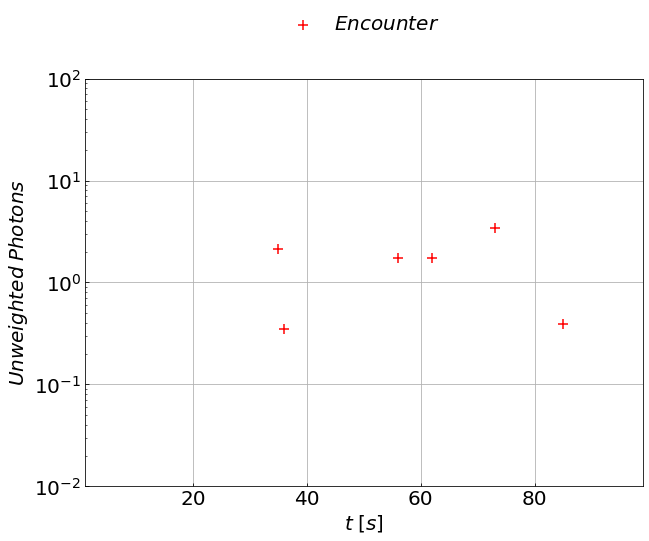

In [11]:
# Energy distributions
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
data = np.array([np.sum(fd.statistics[i].loc[:, 'encounter photons'].values)
                 for i in range(len(fd.t))])
ax1.scatter(fd.t,
            data,
            s=lw*30, color='r', label=r'$Encounter$', marker="+")
ax1.set_xlim(1e0, max(fd.t))
ax1.set_ylim(1e-2, 1e2)
ax1.set_xscale('linear')
ax1.set_yscale('log')
ax1.set_xlabel(r'$t\;[s]$', fontsize=fontsize)
ax1.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
ax1.grid(True)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h[:2],l[:2], loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
lgd2 = ax1.legend(h[2:],l[2:], loc=9, bbox_to_anchor=(0.5, +1.2),
                  ncol=2, fontsize=fontsize, handlelength=h_length,
                  fancybox=True, frameon=False)
ax1.add_artist(lgd1)
plt.show()

In [12]:
figure.savefig(PICS + "MC_Example.png",
               bbox_inches='tight')